         Date  MinTemp  MaxTemp  Rainfall
0  2023-01-01       15       25       5.0
1  2023-01-02       16       26       0.0
2  2023-01-03       14       24       1.2
3  2023-01-04       13       23       0.0
4  2023-01-05       12       22       7.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      59 non-null     object 
 1   MinTemp   59 non-null     int64  
 2   MaxTemp   59 non-null     int64  
 3   Rainfall  59 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB
None
         MinTemp    MaxTemp   Rainfall
count  59.000000  59.000000  59.000000
mean   12.559322  22.186441   0.952542
std     1.523055   1.916126   2.046810
min    10.000000  19.000000   0.000000
25%    12.000000  21.000000   0.000000
50%    13.000000  22.000000   0.000000
75%    14.000000  24.000000   0.000000
max    16.000000  26.000000   8.5

C:\Users\khada\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


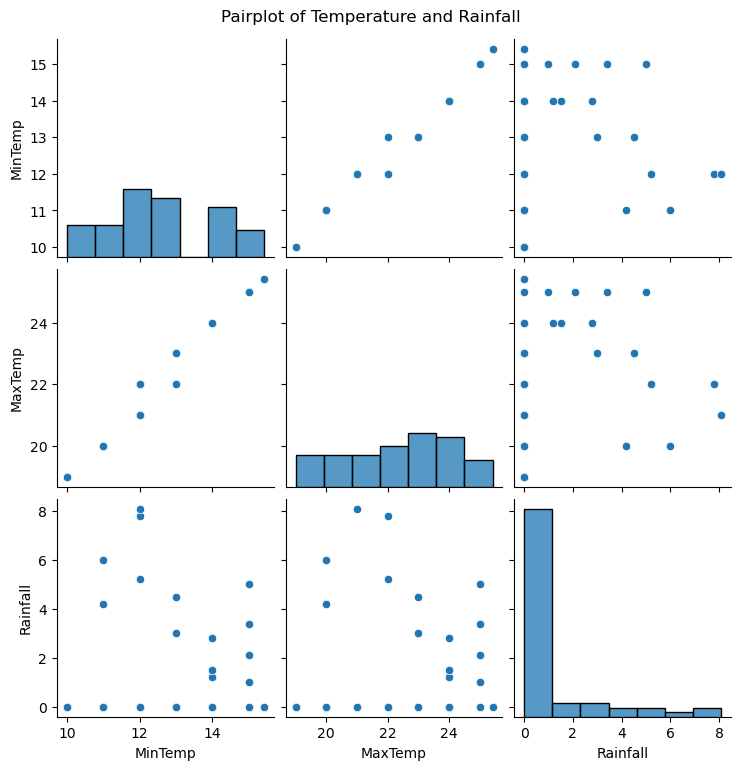

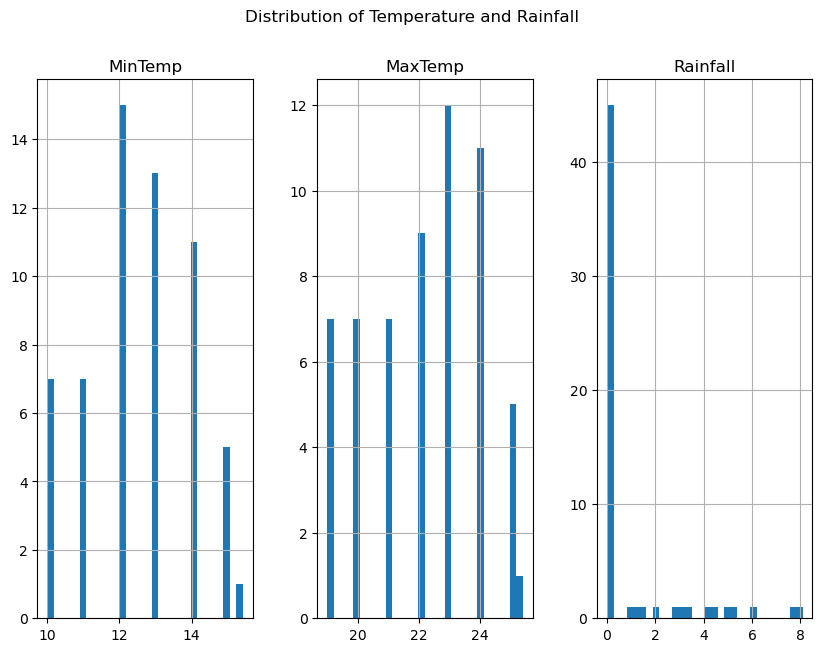

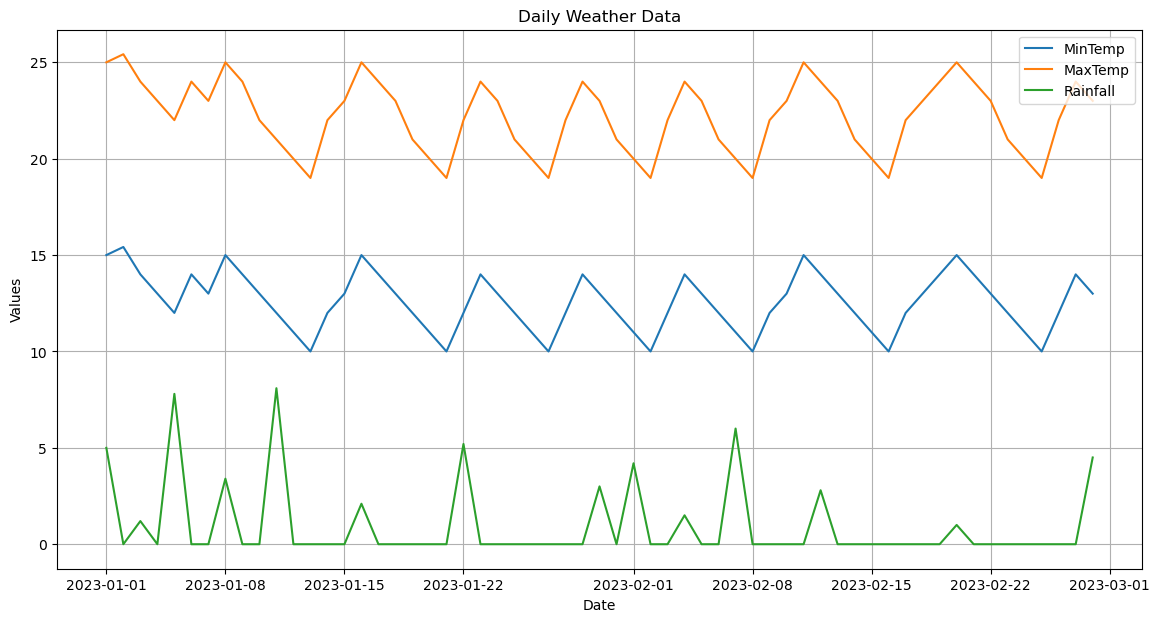

         MinTemp    MaxTemp
Month                      
1      12.723226  22.368387
2      12.357143  21.964286
Month
1    35.794
2    20.000
Name: Rainfall, dtype: float64


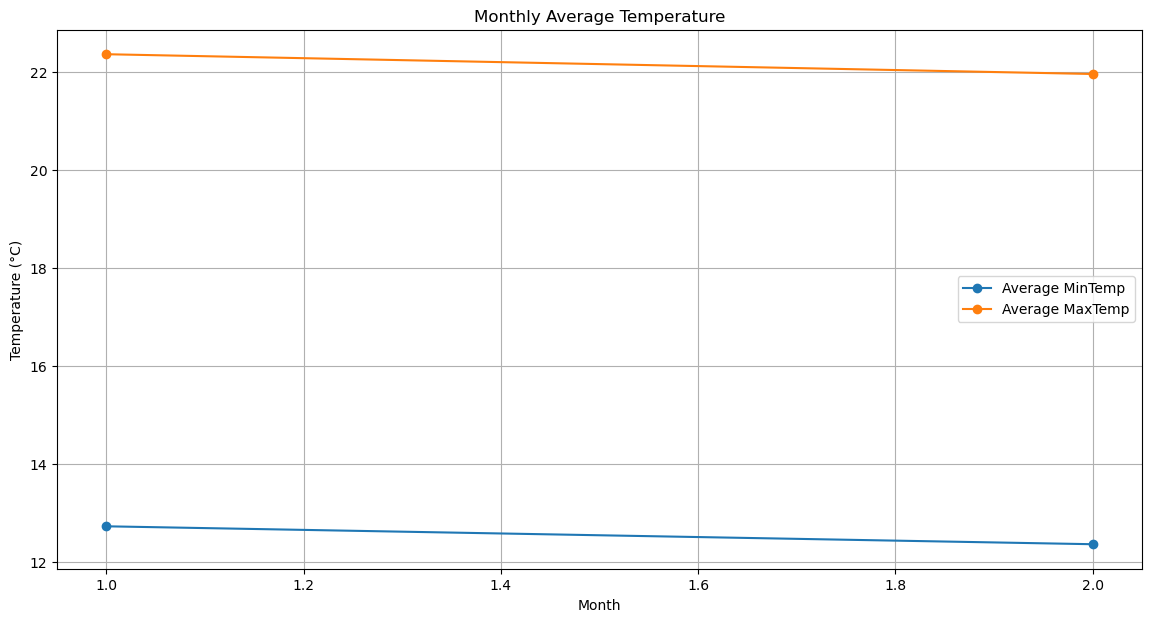

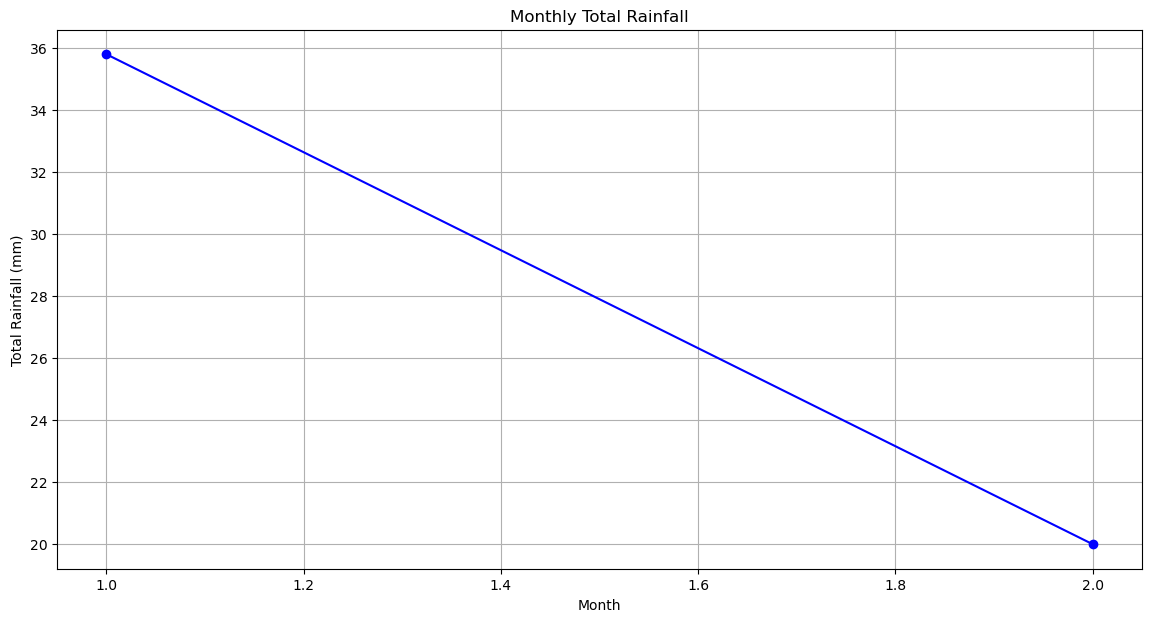

           MinTemp   MaxTemp  Rainfall
MinTemp   1.000000  0.985703  0.068936
MaxTemp   0.985703  1.000000  0.065855
Rainfall  0.068936  0.065855  1.000000


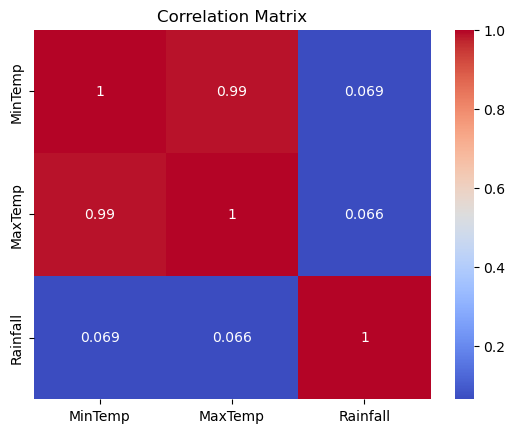

Conclusions:
1. Monthly average temperatures show the expected seasonal pattern.
2. Rainfall varies significantly by month, with certain months showing higher totals.
3. There is a positive correlation between MinTemp and MaxTemp, as expected.
Future work:
1. Analyze the impact of other factors like humidity and wind speed.
2. Develop predictive models for weather forecasting.
3. Explore the impact of weather patterns on local events or agriculture.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Step 1: Load the Data
# Replace 'daily_weather.csv' with the path to your CSV file
df = pd.read_csv('dailyweather.csv')

# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Data Cleaning
# Handle missing values
df.dropna(subset=['Date', 'MinTemp', 'MaxTemp', 'Rainfall'], inplace=True)

# Ensure Date is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for outliers and handle them if necessary
# Example: Cap extreme values
df['MinTemp'] = df['MinTemp'].clip(lower=df['MinTemp'].quantile(0.01), upper=df['MinTemp'].quantile(0.99))
df['MaxTemp'] = df['MaxTemp'].clip(lower=df['MaxTemp'].quantile(0.01), upper=df['MaxTemp'].quantile(0.99))
df['Rainfall'] = df['Rainfall'].clip(lower=df['Rainfall'].quantile(0.01), upper=df['Rainfall'].quantile(0.99))

# Step 4: Data Visualization
# Pairplot
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.suptitle('Pairplot of Temperature and Rainfall', y=1.02)
plt.show()

# Distribution of features
df[['MinTemp', 'MaxTemp', 'Rainfall']].hist(bins=30, figsize=(10, 7), layout=(1, 3))
plt.suptitle('Distribution of Temperature and Rainfall')
plt.show()

# Time series plot
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['MinTemp'], label='MinTemp')
plt.plot(df['Date'], df['MaxTemp'], label='MaxTemp')
plt.plot(df['Date'], df['Rainfall'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Daily Weather Data')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Basic Analysis
# Add Month and Year columns
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Monthly average temperature
monthly_avg_temp = df.groupby('Month')[['MinTemp', 'MaxTemp']].mean()
print(monthly_avg_temp)

# Monthly total rainfall
monthly_total_rainfall = df.groupby('Month')['Rainfall'].sum()
print(monthly_total_rainfall)

# Visualization of monthly averages
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp['MinTemp'], marker='o', label='Average MinTemp')
plt.plot(monthly_avg_temp.index, monthly_avg_temp['MaxTemp'], marker='o', label='Average MaxTemp')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly Average Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of monthly total rainfall
plt.figure(figsize=(14, 7))
plt.plot(monthly_total_rainfall.index, monthly_total_rainfall.values, marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.title('Monthly Total Rainfall')
plt.grid(True)
plt.show()

# Step 6: Advanced Analysis (Optional)
# Example: Correlation analysis
correlation_matrix = df[['MinTemp', 'MaxTemp', 'Rainfall']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Save the results
monthly_avg_temp.to_csv('monthly_avg_temp.csv', index=True)
monthly_total_rainfall.to_csv('monthly_total_rainfall.csv', index=True)

# Step 7: Conclusions and Insights
print("Conclusions:")
print("1. Monthly average temperatures show the expected seasonal pattern.")
print("2. Rainfall varies significantly by month, with certain months showing higher totals.")
print("3. There is a positive correlation between MinTemp and MaxTemp, as expected.")

# Step 8: Future Work (Optional)
print("Future work:")
print("1. Analyze the impact of other factors like humidity and wind speed.")
print("2. Develop predictive models for weather forecasting.")
print("3. Explore the impact of weather patterns on local events or agriculture.")
